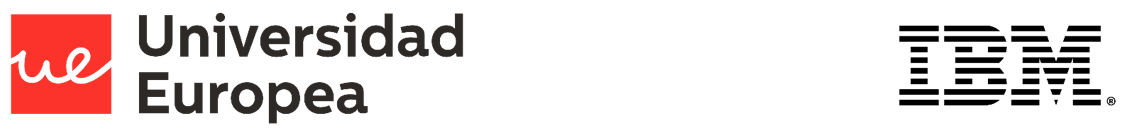

# <font color=#444444> Analisis morfologico y de sentimientos de un texto con NCTK y Spacy </font>
### <font color=#999999> Master Online IA y Data Science </font>  
**Alumno**: 
**Carlos Lopez Barbera**
**Unidad 1**

**Enunciado**


---


El objetivo de esta práctica es realizar un notebook en Python que realice un análisis
morfológico y extraiga las entidades que se presenten en un texto. Las entidades para
extraer serán de tipo organización, localización y persona. Para realizar esta actividad
se podrán utilizar las librerías de NLTK y spaCy.
El ejercicio deberá ser completado en su totalidad en un notebook (Google Colab).



---



# Enlace a Google Colab

[https://colab.research.google.com/drive/16HR_5L_dnIEaau0TzxMukk1ipyK1ds3k?usp=sharing](https://colab.research.google.com/drive/16HR_5L_dnIEaau0TzxMukk1ipyK1ds3k?usp=sharing)

## Librerias

In [259]:

### Librerias de acceso a archivos ###
import pickle

### Librerias de calculo computacional ###
import pandas as pd 
import numpy as np 


### Librerias NLTK y Spacy ###
import spacy
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')


### Idiomas descargados de la web de Spacy###
!python -m spacy download en_core_web_md
!python -m spacy download es_core_news_md


#Importamos la libreria Google Drive y dpath. 
from google.colab import drive
drive.mount('/gdrive')#%cd /gdrive

dpath = "/gdrive/My Drive/Colab Notebooks/Modulo 5/Entrega"



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


2023-05-09 15:46:44.144195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
2023-05-09 15:46:58.670743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [260]:
### Creacion de la clases para el Analisis de textos con el uso de NLTK y Spacy. ###

class Sentimental_Analisis_Nltk():
    def __init__(self, language):
       self.language = language
       

    ### Apartados 1 y 2 - Division del texto en formas basicas (tokens), stop-words y normalizacion.###
    def open_file(self, dpath, filename):
        """Esta funcion leera los arhvivos deseados en la carpeta de destino."""
        try: 
            with open(f'{dpath}/{filename}', 'r',encoding='utf8') as file:
                file = file.readline()
                print(file)
            self.archivo = file      
        except FileNotFoundError:
            print(f'El archivo que estas buscando en el file path "{dpath}"" no se encuentra o no esta disponible.\n Revise el nombre del archivo y su dpath en Google Drive para su correcta localizacion')
    
    
    def sentence(self):
        """Esta funcion pre-procesa la frase y la guarda en una lista de frases."""

        self.list_sentences = self.archivo.lower().split(".")
        print(self.list_sentences)


    def tokenization(self):
        """Esta funcion pre-procesa el texto con la finalidad de guardarlo en una lista de palabras o en las formas basicas para procesar textos. """
        punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        for ele in punc:
            if ele in punc:
                self.archivo = self.archivo.replace(ele,"")
        self.list_words = set(self.archivo.lower().split())
        print(self.list_words)
         

    def filter_stop_words(self):
        """Este paso consiste en eliminar palabras que se consideran 'vacías' o que no aportan significado a la frase. Se suele incluir, por ejemplo, en los sistemas de búsqueda."""
        nltk.download('stopwords')
        stopwords = set(nltk.corpus.stopwords.words(self.language))
        self.review_words = [word for word in self.list_words if word not in stopwords]
        print(f"El conteo de palabras de la lista incial es de {len(self.list_words)} y usando el filtro de stop-words el conteo de palabras se reduce a {len(self.review_words)}.")
    

    def stem_words(self):
        """El stemming consiste en sustituir cada palabra por su forma mas básica, eliminando prefijos, sufijos, etc..."""
        p_stem = nltk.stem.porter.PorterStemmer().stem
        self.stem_words = [p_stem(word) for word in self.review_words]
        print(self.stem_words)


    ### Apartado 3 - POS o Part of Speech ###
    def tag(self):
        """POS o analisis morfologico de una frase. """
        self.tag = nltk.pos_tag(self.stem_words)
        return self.tag 
     ### Apartado 4 y 5 - Extraccion de entidades de un texto.  ###

    ### Apartado 4 y 5 - Extraccion de entidades de un texto.  ###
    def entities(self):
        """Esta funcion se encargar de reconocer entidades en el texto."""
        # En esta ocasion no me reconocia las entidades de manera correcta por lo que he buscado una alternativa
        self.ent = nltk.ne_chunk(nltk.pos_tag(word_tokenize(self.archivo)))
        return self.ent
    

## Creacion de la clase para el Analisis de textos con el uso de Spacy ###
class Sentimental_Analisis_Spacy():
    def __init__(self, language):
       self.language = language
       #en_core_web_md
       #es_core_news_md


    ### Apartados 1 y 2 - Division del texto en formas basicas (tokens), stop-words y normalizacion.###
    def open_file(self, dpath, filename):
        """Esta funcion leera los arhvivos deseados en la carpeta de destino."""
        try: 
            with open(f'{dpath}/{filename}', 'r',encoding='utf8') as file:
                file = file.readline()
                print(file)
            self.archivo = file      
        except FileNotFoundError:
            print(f'El archivo que estas buscando en el file path "{dpath}"" no se encuentra o no esta disponible.\n Revise el nombre del archivo y su dpath en Google Drive para su correcta localizacion')

    ### Apartado 3 - POS o Part of Speech ###
    def process_text(self):
        """Esta funcion procesa los archivos con el uso de la libreria Spacy."""
        if self.language == 'spanish':
            self.nlp = spacy.load('es_core_news_md') # carga el lenguaje
            for word in self.nlp.Defaults.stop_words: # carga las stop words
                self.nlp.vocab[word].is_stop = True
            self.processed_text = self.nlp(self.archivo)
        if self.language == 'english':
            self.nlp = spacy.load('en_core_web_md') # carga el lenguaje
            for word in self.nlp.Defaults.stop_words: # carga las stop words
                self.nlp.vocab[word].is_stop = True
            self.processed_text = self.nlp(self.archivo)
    
        self.processed_tokens = [(token.text, token.lemma_, token.pos_, token.tag_, str(token.is_stop)) for token in self.processed_text]
        self.df_tokens = pd.DataFrame(self.processed_tokens)
        self.df_tokens.columns = ('Word/Palabra','Lema','POS','TAG','Is stop word? / Es stop word?')
        return self.df_tokens

    ### Apartado 4 y 5 - Extraccion de entidades de un texto.  ###
    def reconigtion_entities(self):
        """Esta funcion se encargar de reconocer entidades en el texto. """
        print("\n Reconocimiento de elementos en el texto: \n")
        for ent in self.processed_text.ents:
            print(ent.text +', '+ ent.label_)
        print("\n Reconocimiento de elementos en el texto con el uso del metodo displacy: \n")
        spacy.displacy.render(self.processed_text, style='ent', jupyter=True)
        print("\n Ejemplo de Analisis Sintactico: \n")
        frase = self.nlp(self.processed_text)
        spacy.displacy.render(frase, style='dep', jupyter=True)



## 1. Dados dos ficheros de texto, uno en español (actividad_1_es.txt) y otro en inglés (actividad_1_en.txt):

## 2. Leer ambos ficheros y realizar las labores de pre-procesamiento habituales: división en frases, división en palabras y conversión a las formas normales.

### 2.1 - Uso de NLTK

Con la funcion open_file que hemos creado en la clase de "Sentimental Analisis" para mejorar el funcionamiento y la organizacion de la actividad ha leido con exito el archivo txt en espanol como "actividad_esp" y en ingles "actividad_eng" y principalmente vamos a usar la libreria NLTK. 

Hemos incluido un Try and Except en la funcion de open_file para facilitar el visionado de errores. 

In [261]:
SM_esp = Sentimental_Analisis_Nltk('spanish')
SM_esp.open_file(dpath = dpath, filename = "Actividad 1 esp.txt")

Cuando los cines parecen recuperar su músculo, llega a las salas de España la película "Los Estados Unidos contra Billie Holiday", el desalentador retrato del director Lee Daniels sobre la persecución del Gobierno Federal de Estados Unidos a la gran cantante de jazz desde 1947 hasta su muerte en 1959 a la edad de 44 años. El título de la cinta toma como referencia una frase de la artista, que ingresó en prisión durante un año por un cargo de posesión de narcóticos en el apogeo de su carrera: El caso se llama "Los Estados Unidos de América contra Billie Holiday". Está basado en un capítulo del libro "Tras el grito"



In [262]:
SM_eng = Sentimental_Analisis_Nltk('english')
SM_eng.open_file(dpath = dpath, filename = "Actividad 1 ing.txt")

This week, a Filipino woman was attacked in Midtown Manhattan during broad daylight. This assault came on the heels of the Atlanta-area shooting in which six women of Asian descent were killed and amid reports of rising crime against Asians. One group, Stop AAPI Hate, received nearly 3,800 accounts of incidents nationally between March 19, 2020, and Feb. 28. The poet and author Cathy Park Hong notes that these events have set off outrage in the Asian-American community. Her essay collection “Minor Feelings: An Asian-American Reckoning” wrestles with how discrimination against Asians is often left out in conversations about race in the United States. “We have also been victims to systemic racism throughout history,” Ms. Hong says, “but we have been conditioned to pretend that it doesn’t exist, to minimize it.”


Division en frases.

In [263]:
SM_esp.sentence()

['cuando los cines parecen recuperar su músculo, llega a las salas de españa la película "los estados unidos contra billie holiday", el desalentador retrato del director lee daniels sobre la persecución del gobierno federal de estados unidos a la gran cantante de jazz desde 1947 hasta su muerte en 1959 a la edad de 44 años', ' el título de la cinta toma como referencia una frase de la artista, que ingresó en prisión durante un año por un cargo de posesión de narcóticos en el apogeo de su carrera: el caso se llama "los estados unidos de américa contra billie holiday"', ' está basado en un capítulo del libro "tras el grito"\n']


### Tokenizacion y Normalizacion

Con la funcion **convert_file** que hemos creado en la clase de "Sentimental Analisis" hemos pre-procesado los textos hasta conseguir una lista de palabras obtenidas en la frase. el proceso que se ha seguido ha sido eliminar los signos de puntuacion en primera instancia, convertir las palabras en minuscula con el metodo .lower() que se considera parte de la **Normalizacion**, convertir el string en lista con el  metodo .split() en ambos textos y por ultima realizar un set para eliminar duplicados.





In [264]:
SM_esp.tokenization()

{'cinta', 'que', 'película', 'hasta', 'federal', 'narcóticos', 'libro', 'recuperar', 'la', 'capítulo', 'desde', 'el', 'sobre', 'parecen', 'apogeo', 'carrera', 'cines', 'lee', 'basado', 'contra', 'como', 'persecución', '1947', 'retrato', 'las', 'en', 'por', 'daniels', 'caso', 'américa', 'músculo', 'cuando', 'desalentador', 'director', 'una', 'los', 'está', 'referencia', 'jazz', 'toma', 'año', 'holiday', 'artista', 'salas', 'llega', 'de', 'muerte', 'ingresó', 'un', 'gobierno', 'españa', 'durante', 'cantante', 'frase', 'a', 'prisión', 'posesión', 'unidos', 'título', 'estados', 'tras', 'se', 'gran', 'cargo', 'años', 'llama', 'su', 'billie', '1959', 'edad', '44', 'del', 'grito'}


In [265]:
SM_eng.tokenization()

{'off', 'in', 'conditioned', 'asians', 'that', 'manhattan', 'community', 'and', 'park', 'assault', 'shooting', 'to', 'throughout', 'it”', 'wrestles', 'race', 'accounts', 'feelings', 'victims', 'were', 'essay', 'cathy', '28', 'a', 'midtown', 'attacked', 'group', 'outrage', 'racism', 'an', 'also', 'her', 'heels', 'is', 'doesn’t', 'these', '2020', 'aapi', 'systemic', 'how', 'descent', 'amid', 'exist', 'about', 'six', 'discrimination', 'during', '“minor', 'poet', 'set', 'on', 'hong', 'of', 'reckoning”', 'atlantaarea', 'between', 'reports', 'one', 'been', 'stop', 'collection', 'out', '“we', 'hate', 'incidents', '“but', '19', 'nearly', 'march', 'women', 'asianamerican', 'was', 'notes', 'author', 'this', 'history”', 'which', 'against', 'daylight', 'minimize', 'broad', 'asian', 'with', 'events', 'says', 'received', 'the', 'feb', 'came', '3800', 'we', 'rising', 'crime', 'often', 'pretend', 'have', 'killed', 'filipino', 'states', 'woman', 'it', 'united', 'ms', 'nationally', 'conversations', 'wee

Es importante recalcar que la Tokenizacion se puede realizar de la siguiente manera usando el metodo word_tokenize() de la libreria de NLTK.

In [266]:
with open(f'{dpath}/Actividad 1 esp.txt', 'r',encoding='utf8') as file:
    ejmplo_nltk = file.readline()
    print(ejmplo_nltk)

Cuando los cines parecen recuperar su músculo, llega a las salas de España la película "Los Estados Unidos contra Billie Holiday", el desalentador retrato del director Lee Daniels sobre la persecución del Gobierno Federal de Estados Unidos a la gran cantante de jazz desde 1947 hasta su muerte en 1959 a la edad de 44 años. El título de la cinta toma como referencia una frase de la artista, que ingresó en prisión durante un año por un cargo de posesión de narcóticos en el apogeo de su carrera: El caso se llama "Los Estados Unidos de América contra Billie Holiday". Está basado en un capítulo del libro "Tras el grito"



In [267]:
ejemplo_token = nltk.word_tokenize(ejmplo_nltk)
print(ejemplo_token)

['Cuando', 'los', 'cines', 'parecen', 'recuperar', 'su', 'músculo', ',', 'llega', 'a', 'las', 'salas', 'de', 'España', 'la', 'película', '``', 'Los', 'Estados', 'Unidos', 'contra', 'Billie', 'Holiday', "''", ',', 'el', 'desalentador', 'retrato', 'del', 'director', 'Lee', 'Daniels', 'sobre', 'la', 'persecución', 'del', 'Gobierno', 'Federal', 'de', 'Estados', 'Unidos', 'a', 'la', 'gran', 'cantante', 'de', 'jazz', 'desde', '1947', 'hasta', 'su', 'muerte', 'en', '1959', 'a', 'la', 'edad', 'de', '44', 'años', '.', 'El', 'título', 'de', 'la', 'cinta', 'toma', 'como', 'referencia', 'una', 'frase', 'de', 'la', 'artista', ',', 'que', 'ingresó', 'en', 'prisión', 'durante', 'un', 'año', 'por', 'un', 'cargo', 'de', 'posesión', 'de', 'narcóticos', 'en', 'el', 'apogeo', 'de', 'su', 'carrera', ':', 'El', 'caso', 'se', 'llama', '``', 'Los', 'Estados', 'Unidos', 'de', 'América', 'contra', 'Billie', 'Holiday', "''", '.', 'Está', 'basado', 'en', 'un', 'capítulo', 'del', 'libro', '``', 'Tras', 'el', 'grit

### Filtrado de 'Stop Words'

Este paso consiste en eliminar palabras que se consideran 'vacías' o que no aportan significado a la frase. Se suele incluir, por ejemplo, en los sistemas de búsqueda.

La librería NLTK contiene una lista de 'stop words' que podemos utilizar para filtrar:

In [268]:
SM_esp.filter_stop_words()

El conteo de palabras de la lista incial es de 73 y usando el filtro de stop-words el conteo de palabras se reduce a 50.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
SM_eng.filter_stop_words()

El conteo de palabras de la lista incial es de 107 y usando el filtro de stop-words el conteo de palabras se reduce a 79.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


El stemming consiste en sustituir cada palabra por su forma mas básica, eliminando prefijos, sufijos, etc... La lematización tiene el mismo objetivo solo que de forma mas correcta desde el punto de vista linguístico (sustituye cada palabra por su lema). Aunque da mejores resultados, la lematización es mucho mas lenta ya que requiere el análisis sintáctico de cada oración.

La librería NLTK proporciona uno de los algoritmos de stemming mas utilizados en inglés (Porter Stemmer):

In [270]:
SM_esp.stem_words()

['cinta', 'película', 'feder', 'narcótico', 'libro', 'recuperar', 'capítulo', 'parecen', 'apogeo', 'carrera', 'cine', 'lee', 'basado', 'persecución', '1947', 'retrato', 'daniel', 'caso', 'américa', 'músculo', 'desalentador', 'director', 'referencia', 'jazz', 'toma', 'año', 'holiday', 'artista', 'sala', 'llega', 'muert', 'ingresó', 'gobierno', 'españa', 'cantant', 'frase', 'prisión', 'posesión', 'unido', 'título', 'tra', 'gran', 'cargo', 'año', 'llama', 'billi', '1959', 'edad', '44', 'grito']


In [271]:
SM_eng.stem_words()

['condit', 'asian', 'manhattan', 'commun', 'park', 'assault', 'shoot', 'throughout', 'it”', 'wrestl', 'race', 'account', 'feel', 'victim', 'essay', 'cathi', '28', 'midtown', 'attack', 'group', 'outrag', 'racism', 'also', 'heel', 'doesn’t', '2020', 'aapi', 'system', 'descent', 'amid', 'exist', 'six', 'discrimin', '“minor', 'poet', 'set', 'hong', 'reckoning”', 'atlantaarea', 'report', 'one', 'stop', 'collect', '“we', 'hate', 'incid', '“but', '19', 'nearli', 'march', 'women', 'asianamerican', 'note', 'author', 'history”', 'daylight', 'minim', 'broad', 'asian', 'event', 'say', 'receiv', 'feb', 'came', '3800', 'rise', 'crime', 'often', 'pretend', 'kill', 'filipino', 'state', 'woman', 'unit', 'ms', 'nation', 'convers', 'week', 'left']


### 2.1 - Uso de Spacy

La libreria Spacy engloba todo el preprocesado del texto, por lo que se mostrará en el siguiente apartado.

In [272]:
SM_esp_spacy = Sentimental_Analisis_Spacy('spanish')
SM_eng_spacy = Sentimental_Analisis_Spacy('english')

SM_esp_spacy.open_file(dpath = dpath, filename = "Actividad 1 esp.txt")
SM_eng_spacy.open_file(dpath = dpath, filename = "Actividad 1 ing.txt")

Cuando los cines parecen recuperar su músculo, llega a las salas de España la película "Los Estados Unidos contra Billie Holiday", el desalentador retrato del director Lee Daniels sobre la persecución del Gobierno Federal de Estados Unidos a la gran cantante de jazz desde 1947 hasta su muerte en 1959 a la edad de 44 años. El título de la cinta toma como referencia una frase de la artista, que ingresó en prisión durante un año por un cargo de posesión de narcóticos en el apogeo de su carrera: El caso se llama "Los Estados Unidos de América contra Billie Holiday". Está basado en un capítulo del libro "Tras el grito"

This week, a Filipino woman was attacked in Midtown Manhattan during broad daylight. This assault came on the heels of the Atlanta-area shooting in which six women of Asian descent were killed and amid reports of rising crime against Asians. One group, Stop AAPI Hate, received nearly 3,800 accounts of incidents nationally between March 19, 2020, and Feb. 28. The poet and aut

## 3. Realice un análisis morfológico (POS, Part of Speech) de los términos incluidos.

### 3.1 - Uso de NLTK

In [273]:
pd.DataFrame(SM_esp.tag(), columns = ["Palabras", "Tag"]).head(10)

,Palabras,Tag
0,cinta,NN
1,película,NN
2,feder,NN
3,narcótico,NN
4,libro,NN
5,recuperar,NN
6,capítulo,NN
7,parecen,NN
8,apogeo,NN
9,carrera,NN


In [274]:
pd.DataFrame(SM_eng.tag(), columns = ["Words", "Tag"]).head(10)

,Words,Tag
0,condit,NN
1,asian,JJ
2,manhattan,NN
3,commun,NN
4,park,NN
5,assault,NN
6,shoot,NN
7,throughout,IN
8,it”,JJ
9,wrestl,JJ


En el siguiente apartado podemos ver la guia de tags que ha clasificado NLTK y vamos a observar solamente que es el valor NN ya que proporciona una lista con todos los sifnificados de las palabras. 

In [275]:
nltk.help.brown_tagset("NN")

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...


### 3.2 - Uso de spaCy

Para usar la libreria Spacy lo primero que debemos hacer es descargar los idiomas necesarios para procesar los textos. En nuestro caso como tenemos que descargar los idiomas de ingles y espanol ya que tenemos textos en ambos idiomas. (Los idiomas se encuentran en el apartado librerias se han descargado previamente del uso de Spacy) 


1.   Castellano - en_core_web_md
2.   Ingles - es_core_news_md



In [276]:
df_esp = SM_esp_spacy.process_text()
df_esp.head(10)

,Word/Palabra,Lema,POS,TAG,Is stop word? / Es stop word?
0,Cuando,cuando,SCONJ,SCONJ,True
1,los,el,DET,DET,True
2,cines,cine,NOUN,NOUN,False
3,parecen,parecer,VERB,VERB,False
4,recuperar,recuperar,VERB,VERB,False
5,su,su,DET,DET,True
6,músculo,músculo,NOUN,NOUN,False
7,",",",",PUNCT,PUNCT,False
8,llega,llegar,VERB,VERB,False
9,a,a,ADP,ADP,True


In [277]:
df_eng = SM_eng_spacy.process_text()
df_eng.head(10)

,Word/Palabra,Lema,POS,TAG,Is stop word? / Es stop word?
0,This,this,DET,DT,True
1,week,week,NOUN,NN,False
2,",",",",PUNCT,",",False
3,a,a,DET,DT,True
4,Filipino,filipino,ADJ,JJ,False
5,woman,woman,NOUN,NN,False
6,was,be,AUX,VBD,True
7,attacked,attack,VERB,VBN,False
8,in,in,ADP,IN,True
9,Midtown,Midtown,PROPN,NNP,False


### Apartdado 4. Extraccion de entidades de los textos anteriores y Apartado 5. Una vez realizados todos los análisis, liste en pantalla en resumen de las anotaciones obtenidas (máximo 10 primeros elementos) por idioma: frases, palabras, categoría gramatical del análisis morfológico, y entidades extraídas (solo: localizaciones, organizaciones y personas).

Los apartados 4 y 5 los he juntado ya que he incluido todo el codigo en las clases anteriores de Sentimental_Analisis() y Sentimental_Analisis_Spacy(), ademas de dividir por apartados los procesos en el interior de las clases. Esto se puede ver al pincipio del notebook.  

#### Uso de NLTK


In [278]:
pd.DataFrame(SM_esp.entities(), columns=["Palabras", "Entidades", 2, 3, 4]).drop(columns=[2, 3, 4]).head(10)

,Palabras,Entidades
0,"(Cuando, NNP)",None
1,los,NN
2,cines,NNS
3,parecen,VBP
4,recuperar,JJ
5,su,NN
6,músculo,NN
7,llega,VBZ
8,a,DT
9,las,JJ


In [279]:
pd.DataFrame(SM_eng.entities(), columns=["Words", "Entities", 2]).drop(columns=[2]).head(10)

,Words,Entities
0,This,DT
1,week,NN
2,a,DT
3,"(Filipino, NNP)",None
4,woman,NN
5,was,VBD
6,attacked,VBN
7,in,IN
8,"(Midtown, NNP)",None
9,Manhattan,NNP


#### Uso de Spacy


In [280]:
SM_esp_spacy.reconigtion_entities()


 Reconocimiento de elementos en el texto: 

España, LOC
Los Estados Unidos, LOC
Billie Holiday, MISC
Lee Daniels, PER
Gobierno Federal, LOC
Estados Unidos, LOC
El título de la cinta toma, MISC
Los Estados Unidos de América, LOC
Billie Holiday, MISC
Está basado en un capítulo del libro, MISC

 Reconocimiento de elementos en el texto con el uso del metodo displacy: 




 Ejemplo de Analisis Sintactico: 



In [281]:
SM_eng_spacy.reconigtion_entities()


 Reconocimiento de elementos en el texto: 

This week, DATE
Filipino, NORP
Midtown Manhattan, LOC
Atlanta, GPE
six, CARDINAL
Asian, NORP
Asians, NORP
One, CARDINAL
Stop AAPI Hate, ORG
nearly 3,800, CARDINAL
between March 19, 2020, DATE
Feb. 28, DATE
Cathy Park, PERSON
Asian, NORP
Minor Feelings: An Asian-American Reckoning, WORK_OF_ART
Asians, NORP
the United States, GPE
Hong, PERSON

 Reconocimiento de elementos en el texto con el uso del metodo displacy: 




 Ejemplo de Analisis Sintactico: 



In [282]:
dpath = "/gdrive/My Drive/Colab Notebooks/Modulo 5/Entrega"
filename = "Actividad 1 esp.txt"

with open(f'{dpath}/{filename}', 'r') as file:
                file = file.readline()
                
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for ele in punc:
    if ele in punc:
        file = file.replace(ele,"")
        
print(file.lower())                
    

cuando los cines parecen recuperar su músculo llega a las salas de españa la película los estados unidos contra billie holiday el desalentador retrato del director lee daniels sobre la persecución del gobierno federal de estados unidos a la gran cantante de jazz desde 1947 hasta su muerte en 1959 a la edad de 44 años el título de la cinta toma como referencia una frase de la artista que ingresó en prisión durante un año por un cargo de posesión de narcóticos en el apogeo de su carrera el caso se llama los estados unidos de américa contra billie holiday está basado en un capítulo del libro tras el grito

